In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import os

# Đường dẫn tới thư mục chứa ảnh cần dự đoán
train_dir =('.//Train')

def preprocess_image(image_path): # Changed function parameter to image_path
    # Tải ảnh và thay đổi kích thước
    img = image.load_img(image_path, target_size=(224, 224)) # Use image_path here
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Chuẩn hóa theo yêu cầu của VGG16
    img_array = preprocess_input(img_array)
    return img_array

# Khởi tạo model VGG16
model = VGG16(weights='imagenet') # Initialize the VGG16 model

# Lặp qua từng ảnh trong thư mục
for filename in os.listdir(train_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')): # Check if it's an image file
        image_path = os.path.join(train_dir, filename) # Create full image path

        # Tiền xử lý ảnh
        img_array = preprocess_image(image_path) # Pass image_path to preprocess_image

        # Thực hiện dự đoán
        predictions = model.predict(img_array)

        # Giải mã dự đoán (hiển thị lớp dự đoán và độ tin cậy)
        decoded_predictions = decode_predictions(predictions, top=3)[0]
        print(f"Predictions for {filename}:") # Print filename for clarity
        for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
            print(f"{i+1}: {label} ({score * 100:.2f}%)")

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Xóa các lớp Fully Connected của VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Thêm các lớp mới ở phía trên cùng
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Define paths to your training and validation data
train_dir = './/Train'
val_dir ='.//Test'

# Create ImageDataGenerator for data augmentation and loading
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255) # Only rescale for validation

# Load and generate training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32, # Adjust as needed
    class_mode='categorical' # Use 'binary' if you have only 2 classes
)

# Load and generate validation data
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32, # Adjust as needed
    class_mode='categorical' # Use 'binary' if you have only 2 classes
)

num_classes = len(train_data.class_indices)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Khóa các lớp của VGG16 và chỉ huấn luyện các lớp mới
for layer in base_model.layers:
    layer.trainable = False

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_data, validation_data=val_data, epochs=50)

model.save('vgg_model.h5')

Found 2774 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.


D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5343 - loss: 1.1897

D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5363 - loss: 1.1853 - val_accuracy: 0.8648 - val_loss: 0.5761
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.8886 - loss: 0.3453 - val_accuracy: 0.8713 - val_loss: 0.4885
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.9304 - loss: 0.2295 - val_accuracy: 0.8870 - val_loss: 0.5666
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.9321 - loss: 0.2126 - val_accuracy: 0.9093 - val_loss: 0.4728
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9579 - loss: 0.1445 - val_accuracy: 0.9120 - val_loss: 0.4755
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.9619 - loss: 0.1287 - val_accuracy: 0.9213 - val_loss: 0.4726
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.9711 - loss: 0.1074 - val_accuracy: 0.9278 - val_loss: 0.4425
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.9608 - loss: 0.1074 - val_accuracy: 0.9111 - val_loss: 0.

In [3]:
test_loss, test_accuracy = model.evaluate(val_data)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9148 - loss: 0.8024
Độ chính xác trên tập kiểm tra: 92.31%


Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 34,084,052 (130.02 MB)

 Trainable params: 6,456,454 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,912,910 (49.26 MB)

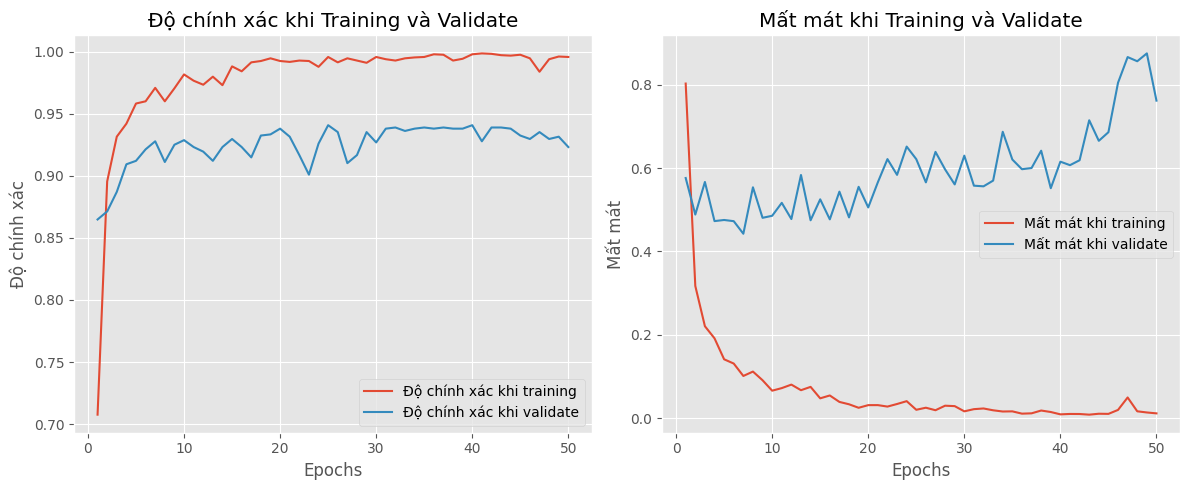

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# In tóm tắt kiến trúc mô hình
print("Model Summary:")
model.summary()

# Trích xuất thông tin từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = len(history.history["loss"])
epochs_range = range(1, num_epochs + 1)

# Thiết lập phong cách ggplot
plt.style.use("ggplot")

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Độ chính xác khi training')
plt.plot(epochs_range, val_acc, label='Độ chính xác khi validate')
plt.title('Độ chính xác khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Độ chính xác')
plt.legend()

# Biểu đồ hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Mất mát khi training')
plt.plot(epochs_range, val_loss, label='Mất mát khi validate')
plt.title('Mất mát khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Mất mát')
plt.legend()

# Đảm bảo bố cục gọn gàng và hiển thị biểu đồ
plt.tight_layout()
plt.show()